##### Let's change gears and talk about Game of thrones or shall I say Network of Thrones.

It is suprising right? What is the relationship between a fatansy TV show/novel and network science or python(it's not related to a dragon).

![](images/got.png)

Andrew J. Beveridge, an associate professor of mathematics at Macalester College, and Jie Shan, an undergraduate created a network from the book A Storm of Swords by extracting relationships between characters to find out the most important characters in the book(or GoT).

The dataset is publicly available for the 5 books at https://github.com/mathbeveridge/asoiaf. This is an interaction network and were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in one of the books. The edge weight corresponds to the number of interactions. 

Credits:

Blog: https://networkofthrones.wordpress.com

Math Horizons Article: https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
book1 = pd.read_csv('data/asoiaf-book1-edges.csv')
book2 = pd.read_csv('data/asoiaf-book2-edges.csv')
book3 = pd.read_csv('data/asoiaf-book3-edges.csv')
book4 = pd.read_csv('data/asoiaf-book4-edges.csv')
book5 = pd.read_csv('data/asoiaf-book5-edges.csv')

In [4]:
book1

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
5,Aemon-Targaryen-(Maester-Aemon),Bowen-Marsh,Undirected,4,1
6,Aemon-Targaryen-(Maester-Aemon),Chett,Undirected,9,1
7,Aemon-Targaryen-(Maester-Aemon),Clydas,Undirected,5,1
8,Aemon-Targaryen-(Maester-Aemon),Jeor-Mormont,Undirected,13,1
9,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,Undirected,34,1


In [9]:
# Creates a graph per book just to save RAM vs. creating one giant graph
G_book1 = nx.Graph()
G_book2 = nx.Graph()
G_book3 = nx.Graph()
G_book4 = nx.Graph()
G_book5 = nx.Graph()

In [10]:
# Adds each edge
for row in book1.iterrows():
    G_book1.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book2.iterrows():
    G_book2.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book3.iterrows():
    G_book3.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book4.iterrows():
    G_book4.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book5.iterrows():
    G_book5.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])

In [13]:
G_book1.edges(data=True)

EdgeDataView([('Addam-Marbrand', 'Jaime-Lannister', {'weight': 3, 'book': 1}), ('Addam-Marbrand', 'Tywin-Lannister', {'weight': 6, 'book': 1}), ('Jaime-Lannister', 'Aerys-II-Targaryen', {'weight': 5, 'book': 1}), ('Jaime-Lannister', 'Barristan-Selmy', {'weight': 4, 'book': 1}), ('Jaime-Lannister', 'Brynden-Tully', {'weight': 7, 'book': 1}), ('Jaime-Lannister', 'Catelyn-Stark', {'weight': 9, 'book': 1}), ('Jaime-Lannister', 'Cersei-Lannister', {'weight': 16, 'book': 1}), ('Jaime-Lannister', 'Eddard-Stark', {'weight': 27, 'book': 1}), ('Jaime-Lannister', 'Edmure-Tully', {'weight': 4, 'book': 1}), ('Jaime-Lannister', 'Galbart-Glover', {'weight': 3, 'book': 1}), ('Jaime-Lannister', 'Gregor-Clegane', {'weight': 3, 'book': 1}), ('Jaime-Lannister', 'Harys-Swyft', {'weight': 3, 'book': 1}), ('Jaime-Lannister', 'Joffrey-Baratheon', {'weight': 12, 'book': 1}), ('Jaime-Lannister', 'Jon-Arryn', {'weight': 5, 'book': 1}), ('Jaime-Lannister', 'Jory-Cassel', {'weight': 4, 'book': 1}), ('Jaime-Lannist

### Finding the most important node i.e character in these networks.

We'll compare different centralities to find the importance of nodes in this network. There is no one right way of calaculating it, every approach has a different meaning. Let's start with degree centrality which is defined by degree of a node divided by a noramlising factor n-1 where n is the number of nodes.

In [14]:
len(list(G_book1.neighbors('Jaime-Lannister')))

29

nx.degree_centrality(graph) returns a dictionary where keys are the nodes and values are the corresponsing degree centrality. Let's find the five most important character according to degree centrality.

In [15]:
nx.degree_centrality(G_book1)

{'Addam-Marbrand': 0.010752688172043012,
 'Aegon-I-Targaryen': 0.010752688172043012,
 'Aemon-Targaryen-(Maester-Aemon)': 0.03763440860215054,
 'Aerys-II-Targaryen': 0.03225806451612903,
 'Aggo': 0.03225806451612903,
 'Albett': 0.016129032258064516,
 'Alliser-Thorne': 0.05376344086021506,
 'Alyn': 0.02688172043010753,
 'Arthur-Dayne': 0.005376344086021506,
 'Arya-Stark': 0.14516129032258066,
 'Arys-Oakheart': 0.005376344086021506,
 'Balon-Greyjoy': 0.010752688172043012,
 'Balon-Swann': 0.010752688172043012,
 'Barristan-Selmy': 0.07526881720430108,
 'Benjen-Stark': 0.07526881720430108,
 'Beric-Dondarrion': 0.03225806451612903,
 'Boros-Blount': 0.02688172043010753,
 'Bowen-Marsh': 0.02688172043010753,
 'Bran-Stark': 0.17204301075268819,
 'Brandon-Stark': 0.03225806451612903,
 'Bronn': 0.05376344086021506,
 'Brynden-Tully': 0.05913978494623656,
 'Catelyn-Stark': 0.23118279569892475,
 'Cayn': 0.016129032258064516,
 'Cersei-Lannister': 0.16129032258064518,
 'Chella': 0.005376344086021506,
 '

In [16]:
sorted(nx.degree_centrality(G_book1).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

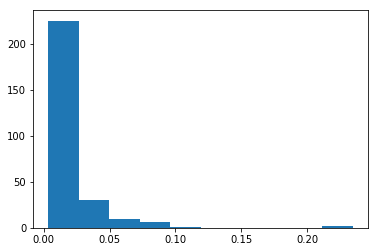

In [17]:
# Plot a histogram of degree centrality
plt.hist(list(nx.degree_centrality(G_book4).values()))
plt.show()

### Exercise

Create a new centrality measure, weighted_degree_centrality(Graph, weight) which

1. Takes in Graph and the weight attribute
2. Then returns a weighted degree centrality dictionary.

Weighted degree is calculated by summing the weight of the all edges of a node and normalise(divide)the weighted degree by the total weight of the graph(sum of weighted degrees of all nodes).

We will find the top five characters according to this measure.

In [18]:
def weighted_degree_centrality(G, weight):
    result = dict()
    total = 0
    for node in G.nodes():
        weight_degree = 0
        for n in G.edges([node], data=True):
            weight_degree += n[2]['weight']
        result[node] = weight_degree
        total += weight_degree
    for node, value in result.items():
        result[node] = value/total
    return result

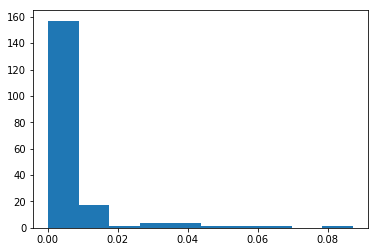

In [19]:
plt.hist(list(weighted_degree_centrality(G_book1, 'weight').values()))
plt.show()

In [20]:
sorted(weighted_degree_centrality(G_book1, 'weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.08715720879717621),
 ('Robert-Baratheon', 0.06387455878360032),
 ('Jon-Snow', 0.05321748574531632),
 ('Tyrion-Lannister', 0.044121639967417865),
 ('Sansa-Stark', 0.03699429812652729),
 ('Bran-Stark', 0.03604398588107521),
 ('Catelyn-Stark', 0.03529731197393429),
 ('Robb-Stark', 0.03502579418951941),
 ('Daenerys-Targaryen', 0.030070594623947868),
 ('Arya-Stark', 0.02918816182459951)]

In [21]:
sum(list(weighted_degree_centrality(G_book1, 'weight').values()))

1.0000000000000002

##### Betweeness centrality 
From Wikipedia:
For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex.


In [22]:
# unweighted
sorted(nx.betweenness_centrality(G_book1).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.2696038913836117),
 ('Robert-Baratheon', 0.21403028397371796),
 ('Tyrion-Lannister', 0.1902124972697492),
 ('Jon-Snow', 0.17158135899829566),
 ('Catelyn-Stark', 0.1513952715347627),
 ('Daenerys-Targaryen', 0.08627015537511595),
 ('Robb-Stark', 0.07298399629664767),
 ('Drogo', 0.06481224290874964),
 ('Bran-Stark', 0.05579958811784442),
 ('Sansa-Stark', 0.03714483664326785)]

In [23]:
sorted(nx.betweenness_centrality(G_book1, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('Robert-Baratheon', 0.23341885664466297),
 ('Eddard-Stark', 0.18703429235687297),
 ('Tyrion-Lannister', 0.15311225972516293),
 ('Robb-Stark', 0.1024018949825402),
 ('Catelyn-Stark', 0.10169012330302643),
 ('Jon-Snow', 0.09027684366394043),
 ('Jaime-Lannister', 0.07745109164464009),
 ('Rodrik-Cassel', 0.07667992877670296),
 ('Drogo', 0.06894355184677767),
 ('Jorah-Mormont', 0.0627085149665795)]

#### PageRank
The billion dollar algorithm, PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

In [24]:
# by default weight attribute in pagerank is weight, so we use weight=None to find the unweighted results

sorted(nx.pagerank_numpy(G_book1, weight=None).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.04552079222830664),
 ('Tyrion-Lannister', 0.03301362462493271),
 ('Catelyn-Stark', 0.030193105286631966),
 ('Robert-Baratheon', 0.029834742227736723),
 ('Jon-Snow', 0.026834499522066242),
 ('Robb-Stark', 0.021562941297247524),
 ('Sansa-Stark', 0.02000803404286466),
 ('Bran-Stark', 0.01994578678623834),
 ('Jaime-Lannister', 0.017507847202846944),
 ('Cersei-Lannister', 0.017082604584758087)]

In [25]:
sorted(nx.pagerank_numpy(G_book1, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.07239401100498237),
 ('Robert-Baratheon', 0.04851727570509938),
 ('Jon-Snow', 0.04770689062474909),
 ('Tyrion-Lannister', 0.04367437892706299),
 ('Catelyn-Stark', 0.03466703470130742),
 ('Bran-Stark', 0.029774200539800223),
 ('Robb-Stark', 0.029216183645196875),
 ('Daenerys-Targaryen', 0.02708962251302111),
 ('Sansa-Stark', 0.02696177891568311),
 ('Cersei-Lannister', 0.02163167939741891)]

### Is there a correlation between these techniques?

#### Exercise

Find the correlation between these three techniques.

In [40]:
cor = pd.DataFrame.from_records([nx.pagerank_numpy(G_book1, weight='weight'), nx.betweenness_centrality(G_book1, weight='weight'), weighted_degree_centrality(G_book1, 'weight')])
cor.index = ['Pagerank', 'Between', 'Weighed']

In [41]:
cor.T

,Pagerank,Between,Weighed
Addam-Marbrand,0.001276,0.000000,0.000611
Aegon-I-Targaryen,0.001254,0.000000,0.000611
Aemon-Targaryen-(Maester-Aemon),0.005811,0.010753,0.005023
Aerys-II-Targaryen,0.003040,0.007183,0.002512
Aggo,0.003122,0.000450,0.002444
Albett,0.001484,0.007169,0.000747
Alliser-Thorne,0.005356,0.026584,0.005430
Alyn,0.002658,0.002693,0.002172
Arthur-Dayne,0.001569,0.000000,0.000272
Arya-Stark,0.021511,0.028114,0.029188


#### What can we infer from this correlation matrix between these three methods?

In [42]:
cor.T.corr()

,Pagerank,Between,Weighed
Pagerank,1.000000,0.870214,0.992166
Between,0.870214,1.000000,0.857222
Weighed,0.992166,0.857222,1.000000


Till now we have been analysing only the first book, but what about the other 4 books? We can now look at the evolution of this character interaction network that adds temporality to this network.

In [46]:
evol = [nx.degree_centrality(graph) for graph in [G_book1, G_book2, G_book3, G_book4, G_book5]]

In [47]:
evol_df = pd.DataFrame.from_records(evol).fillna(0)
evol_df.index = ['Book 1', 'Book 2', 'Book 3', 'Book 4', 'Book 5']
evol_df

,Addam-Marbrand,Aegon-Frey-(son-of-Stevron),Aegon-I-Targaryen,Aegon-Targaryen-(son-of-Rhaegar),Aegon-V-Targaryen,Aemon-Targaryen-(Dragonknight),Aemon-Targaryen-(Maester-Aemon),Aenys-Frey,Aeron-Greyjoy,Aerys-I-Targaryen,...,Yellow-Dick,Yezzan-zo-Qaggaz,Ygritte,Yohn-Royce,Yoren,Yorko-Terys,Ysilla,Yurkhaz-zo-Yunzak,Zei,Zollo
Book 1,0.010753,0.000000,0.010753,0.000000,0.000000,0.000000,0.037634,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.037634,0.000000,0.000000,0.000000,0.000000,0.000000
Book 2,0.000000,0.000000,0.019380,0.000000,0.003876,0.000000,0.023256,0.003876,0.007752,0.003876,...,0.000000,0.000000,0.015504,0.000000,0.046512,0.000000,0.000000,0.000000,0.000000,0.000000
Book 3,0.026490,0.013245,0.009934,0.003311,0.000000,0.003311,0.059603,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.033113,0.003311,0.000000,0.000000,0.000000,0.000000,0.003311,0.006623
Book 4,0.014652,0.000000,0.000000,0.003663,0.003663,0.000000,0.025641,0.000000,0.051282,0.000000,...,0.000000,0.000000,0.000000,0.029304,0.000000,0.003663,0.000000,0.000000,0.000000,0.007326
Book 5,0.000000,0.000000,0.003165,0.047468,0.000000,0.000000,0.015823,0.009494,0.006329,0.000000,...,0.009494,0.015823,0.006329,0.000000,0.000000,0.000000,0.018987,0.003165,0.000000,0.000000


In [48]:
pd.DataFrame.from_records(evol).max(axis=0).sort_values(ascending=False)[0:10]

Eddard-Stark          0.354839
Robert-Baratheon      0.268817
Tyrion-Lannister      0.247312
Jaime-Lannister       0.234432
Catelyn-Stark         0.231183
Cersei-Lannister      0.219780
Jon-Snow              0.198925
Robb-Stark            0.188172
Sansa-Stark           0.188172
Daenerys-Targaryen    0.183544
dtype: float64

##### Exercise

Plot the evolution of weighted degree centrality of the above mentioned characters over the 5 books, and repeat the same exercise for betweenness centrality.

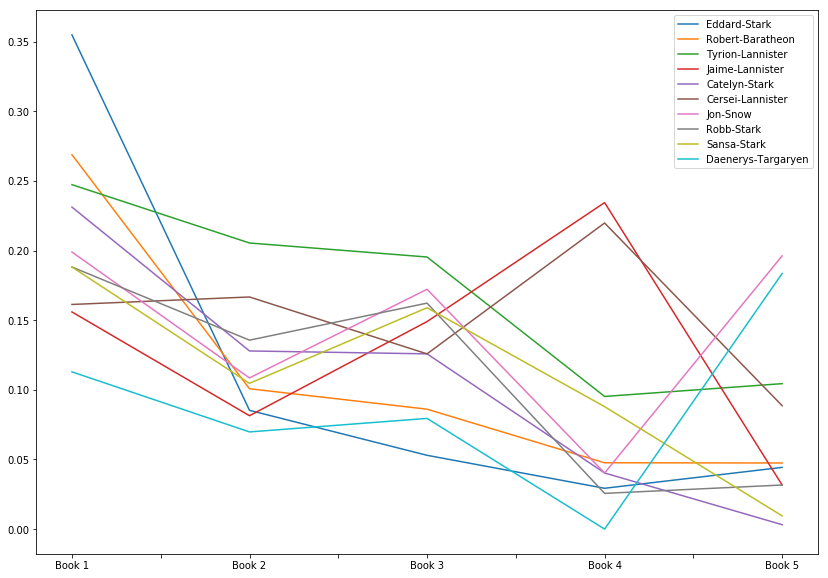

In [49]:
evol_df[list(pd.DataFrame.from_records(evol).max(axis=0).sort_values(ascending=False)[0:10].index)].plot(figsize=(14,10))
plt.show()

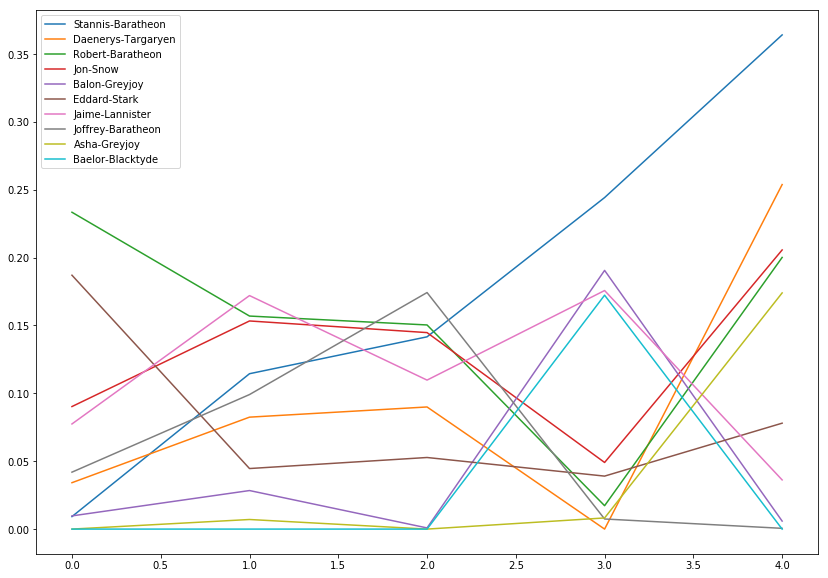

In [50]:
evol = [nx.betweenness_centrality(graph, weight='weight') for graph in [G_book1, G_book2, G_book3, G_book4, G_book5]]
evol_df = pd.DataFrame.from_records(evol).fillna(0)
evol_df[list(pd.DataFrame.from_records(evol).max(axis=0).sort_values(ascending=False)[0:10].index)].plot(figsize=(14,10))
plt.show()

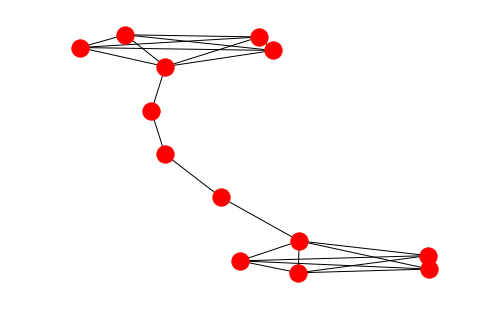

In [51]:
nx.draw(nx.barbell_graph(5, 3))

In [52]:
print(G_book4.edges(data=True))

[('Addam-Marbrand', 'Brynden-Tully', {'weight': 3, 'book': 4}), ('Addam-Marbrand', 'Cersei-Lannister', {'weight': 3, 'book': 4}), ('Addam-Marbrand', 'Jaime-Lannister', {'weight': 8, 'book': 4}), ('Addam-Marbrand', 'Lyle-Crakehall', {'weight': 4, 'book': 4}), ('Brynden-Tully', 'Catelyn-Stark', {'weight': 3, 'book': 4}), ('Brynden-Tully', 'Daven-Lannister', {'weight': 3, 'book': 4}), ('Brynden-Tully', 'Edmure-Tully', {'weight': 15, 'book': 4}), ('Brynden-Tully', 'Edwyn-Frey', {'weight': 3, 'book': 4}), ('Brynden-Tully', 'Emmon-Frey', {'weight': 7, 'book': 4}), ('Brynden-Tully', 'Jaime-Lannister', {'weight': 18, 'book': 4}), ('Brynden-Tully', 'Lyle-Crakehall', {'weight': 4, 'book': 4}), ('Brynden-Tully', 'Ryman-Frey', {'weight': 3, 'book': 4}), ('Cersei-Lannister', 'Aerys-II-Targaryen', {'weight': 3, 'book': 4}), ('Cersei-Lannister', 'Aurane-Waters', {'weight': 9, 'book': 4}), ('Cersei-Lannister', 'Baelor-I-Targaryen', {'weight': 5, 'book': 4}), ('Cersei-Lannister', 'Balman-Byrch', {'weig

In [53]:
sorted(nx.degree_centrality(G_book4).items(), key=lambda x:x[1], reverse=True)

[('Jaime-Lannister', 0.23443223443223443),
 ('Cersei-Lannister', 0.21978021978021978),
 ('Brienne-of-Tarth', 0.10256410256410256),
 ('Tyrion-Lannister', 0.09523809523809523),
 ('Margaery-Tyrell', 0.09157509157509157),
 ('Sansa-Stark', 0.0879120879120879),
 ('Tommen-Baratheon', 0.0879120879120879),
 ('Samwell-Tarly', 0.07326007326007326),
 ('Stannis-Baratheon', 0.07326007326007326),
 ('Petyr-Baelish', 0.0695970695970696),
 ('Victarion-Greyjoy', 0.06227106227106227),
 ('Arianne-Martell', 0.06227106227106227),
 ('Tywin-Lannister', 0.05860805860805861),
 ('Arya-Stark', 0.05860805860805861),
 ('Osmund-Kettleblack', 0.054945054945054944),
 ('Pycelle', 0.054945054945054944),
 ('Robert-Arryn', 0.054945054945054944),
 ('Aeron-Greyjoy', 0.05128205128205128),
 ('Qyburn', 0.05128205128205128),
 ('Robert-Baratheon', 0.047619047619047616),
 ('Myrcella-Baratheon', 0.047619047619047616),
 ('Joffrey-Baratheon', 0.047619047619047616),
 ('Euron-Greyjoy', 0.04395604395604395),
 ('Doran-Martell', 0.0439560

In [54]:
sorted(nx.betweenness_centrality(G_book4).items(), key=lambda x:x[1], reverse=True)

[('Stannis-Baratheon', 0.2763060074924735),
 ('Cersei-Lannister', 0.2754801247893542),
 ('Jaime-Lannister', 0.24281879137413512),
 ('Balon-Greyjoy', 0.19059739280327515),
 ('Sansa-Stark', 0.1527539849794001),
 ('Samwell-Tarly', 0.14017750259452305),
 ('Brienne-of-Tarth', 0.10983433361994),
 ('Arya-Stark', 0.10811867422049978),
 ('Myrcella-Baratheon', 0.10733125876990203),
 ('Tyrion-Lannister', 0.09115907355043472),
 ('Tywin-Lannister', 0.07914666016951145),
 ('Petyr-Baelish', 0.06900929580070034),
 ('Jon-Snow', 0.06580336804602635),
 ('Doran-Martell', 0.058731028230935844),
 ('Victarion-Greyjoy', 0.058487818204204595),
 ('Tommen-Baratheon', 0.057887565750964785),
 ('Arianne-Martell', 0.05744789709809323),
 ('Aeron-Greyjoy', 0.050064384728250276),
 ('Sandor-Clegane', 0.03962871098261215),
 ('Euron-Greyjoy', 0.03710234093637441),
 ('Margaery-Tyrell', 0.03601374523516801),
 ('Alleras', 0.03331786983153946),
 ('Robert-Arryn', 0.029610386518047076),
 ('Aerys-II-Targaryen', 0.029258674623695

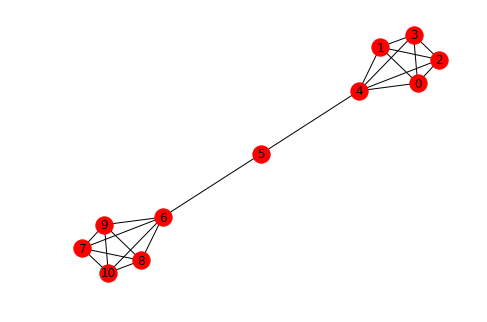

In [55]:
G = nx.barbell_graph(5, 1)
nx.draw(G, with_labels=True)

In [56]:
nx.degree_centrality(G)

{0: 0.4,
 1: 0.4,
 2: 0.4,
 3: 0.4,
 4: 0.5,
 5: 0.2,
 6: 0.5,
 7: 0.4,
 8: 0.4,
 9: 0.4,
 10: 0.4}

In [57]:
nx.betweenness_centrality(G)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5333333333333333,
 5: 0.5555555555555556,
 6: 0.5333333333333333,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0}

Where is Stannis Baratheon in degree centrality measure? Not even in top 10. Strange?

### Community detection in Networks
A network is said to have community structure if the nodes of the network can be easily grouped into (potentially overlapping) sets of nodes such that each set of nodes is densely connected internally.

We will use louvain community detection algorithm to find the modules in our graph.

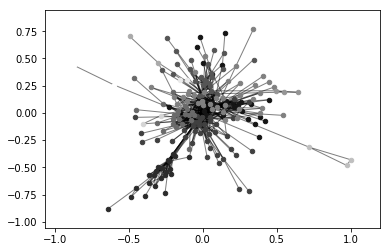

In [45]:
partition = community.best_partition(G_book1)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G_book1)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G_book1, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G_book1, pos, alpha=0.5)
plt.show()

In [48]:
d = {}
for character, par in partition.items():
    if par in d:
        d[par].append(character)
    else:
        d[par] = [character]
d

{0: ['Addam-Marbrand',
  'Jaime-Lannister',
  'Tywin-Lannister',
  'Tyrion-Lannister',
  'Bronn',
  'Chiggen',
  'Marillion',
  'Shae',
  'Shagga',
  'Vardis-Egen',
  'Willis-Wode',
  'Colemon',
  'Chella',
  'Conn',
  'Coratt',
  'Dolf',
  'Gunthor-son-of-Gurn',
  'Harys-Swyft',
  'Kevan-Lannister',
  'Kurleket',
  'Leo-Lefford',
  'Mord',
  'Timett',
  'Ulf-son-of-Umar'],
 1: ['Aegon-I-Targaryen',
  'Daenerys-Targaryen',
  'Aggo',
  'Drogo',
  'Jhogo',
  'Jorah-Mormont',
  'Quaro',
  'Rakharo',
  'Cohollo',
  'Haggo',
  'Qotho',
  'Doreah',
  'Eroeh',
  'Illyrio-Mopatis',
  'Irri',
  'Jhiqui',
  'Mirri-Maz-Duur',
  'Viserys-Targaryen',
  'Jommo',
  'Ogo',
  'Rhaego',
  'Fogo'],
 2: ['Eddard-Stark',
  'Aerys-II-Targaryen',
  'Brandon-Stark',
  'Gerold-Hightower',
  'Jon-Arryn',
  'Robert-Baratheon',
  'Alyn',
  'Harwin',
  'Jory-Cassel',
  'Tomard',
  'Arthur-Dayne',
  'Cersei-Lannister',
  'Petyr-Baelish',
  'Vayon-Poole',
  'Arys-Oakheart',
  'Balon-Greyjoy',
  'Renly-Baratheon',
  

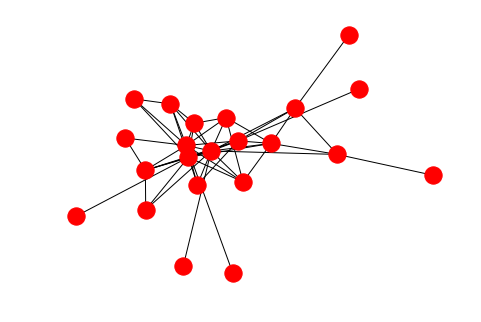

In [58]:
nx.draw(nx.subgraph(G_book1, d[4]))

In [52]:
nx.density(G_book1)

0.03933068828704502

In [56]:
nx.density(nx.subgraph(G_book1, d[4]))

0.22943722943722944

In [57]:
nx.density(nx.subgraph(G_book1, d[4]))/nx.density(G_book1)

5.833542188805347

#### Exercise 

Find the most important node in the partitions according to pagerank, degree centrality and betweenness centrality of the nodes.

In [59]:
max_d = {}
page = nx.pagerank(G_book1)
for par in d:
    temp = 0
    for chars in d[par]:
        if page[chars] > temp:
            max_d[par] = chars
max_d

{0: 'Ulf-son-of-Umar',
 1: 'Fogo',
 2: 'Lancel-Lannister',
 3: 'Randyll-Tarly',
 4: 'Maegor-I-Targaryen',
 5: 'Lyn-Corbray',
 6: 'Will-(prologue)',
 7: 'Karyl-Vance',
 8: 'Jared-Frey',
 9: 'Torrhen-Karstark',
 10: 'Morrec',
 11: 'Paxter-Redwyne'}

In [60]:
max_d = {}
page = nx.betweenness_centrality(G_book1)
for par in d:
    temp = 0
    for chars in d[par]:
        if page[chars] > temp:
            max_d[par] = chars
max_d

{0: 'Conn',
 1: 'Ogo',
 2: 'Wyl-(guard)',
 3: 'Jaremy-Rykker',
 4: 'Marq-Piper',
 5: 'Roose-Bolton',
 6: 'Gared',
 7: 'Karyl-Vance',
 8: 'Danwell-Frey',
 9: 'Torrhen-Karstark',
 11: 'Mace-Tyrell'}

In [61]:
max_d = {}
page = nx.degree_centrality(G_book1)
for par in d:
    temp = 0
    for chars in d[par]:
        if page[chars] > temp:
            max_d[par] = chars
max_d

{0: 'Ulf-son-of-Umar',
 1: 'Fogo',
 2: 'Lancel-Lannister',
 3: 'Randyll-Tarly',
 4: 'Maegor-I-Targaryen',
 5: 'Lyn-Corbray',
 6: 'Will-(prologue)',
 7: 'Karyl-Vance',
 8: 'Jared-Frey',
 9: 'Torrhen-Karstark',
 10: 'Morrec',
 11: 'Paxter-Redwyne'}

In [58]:
d[8]

['Danwell-Frey', 'Hosteen-Frey', 'Jared-Frey']